<a href="https://colab.research.google.com/github/ajlorenzetti/Project/blob/main/WineProject_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

df = pd.read_csv (r'C:\Users\AlienwareR3\Desktop\Wine\wine_data.csv') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
print (df)
from sklearn.model_selection import train_test_split
# quality is the output
y = df['quality'].values

# Then we pick out some features as the inputs
excluded = ["quality", "drop","pH","density","total_sulfur_dioxide","free_sulfur_dioxide","chlorides","residual_sugar","fixed_acidity"]
X = df.drop(excluded, axis=1)  # axis = 1 means drop columns
#print("There are {} possible descriptors:\n\n{}".format(X.shape[1], X.columns.values))



      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'drop'],
      dtype='object')

In [ ]:
df.describe()    # Some basic statistics of the data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,drop
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,0.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,NaN
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,NaN


In [ ]:
# Add more composition-based features to the dataset

In [ ]:
df.shape  # A quick check of the size of the dataset

(1599, 13)

In [ ]:
# Two ways to check all column names (names of all features)
list(df)
# list(df.columns.values)

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'drop']

In [ ]:
# Try some different machine learning models to relate input features to the bulk modulus

In [ ]:
# print(X.shape)
print( type(X) )
# # X.head
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


<class 'pandas.core.frame.DataFrame'>
(1279, 4)
(1279,)
(320, 4)
(320,)


In [ ]:
# Homework: read Demo_2, and train linear regression, random forest models on the X-Y dataset

In [ ]:
# Use the ML algorithms provided in scikit-learn (sklearn)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
#training linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

y_predlr=lr.predict(x_test)

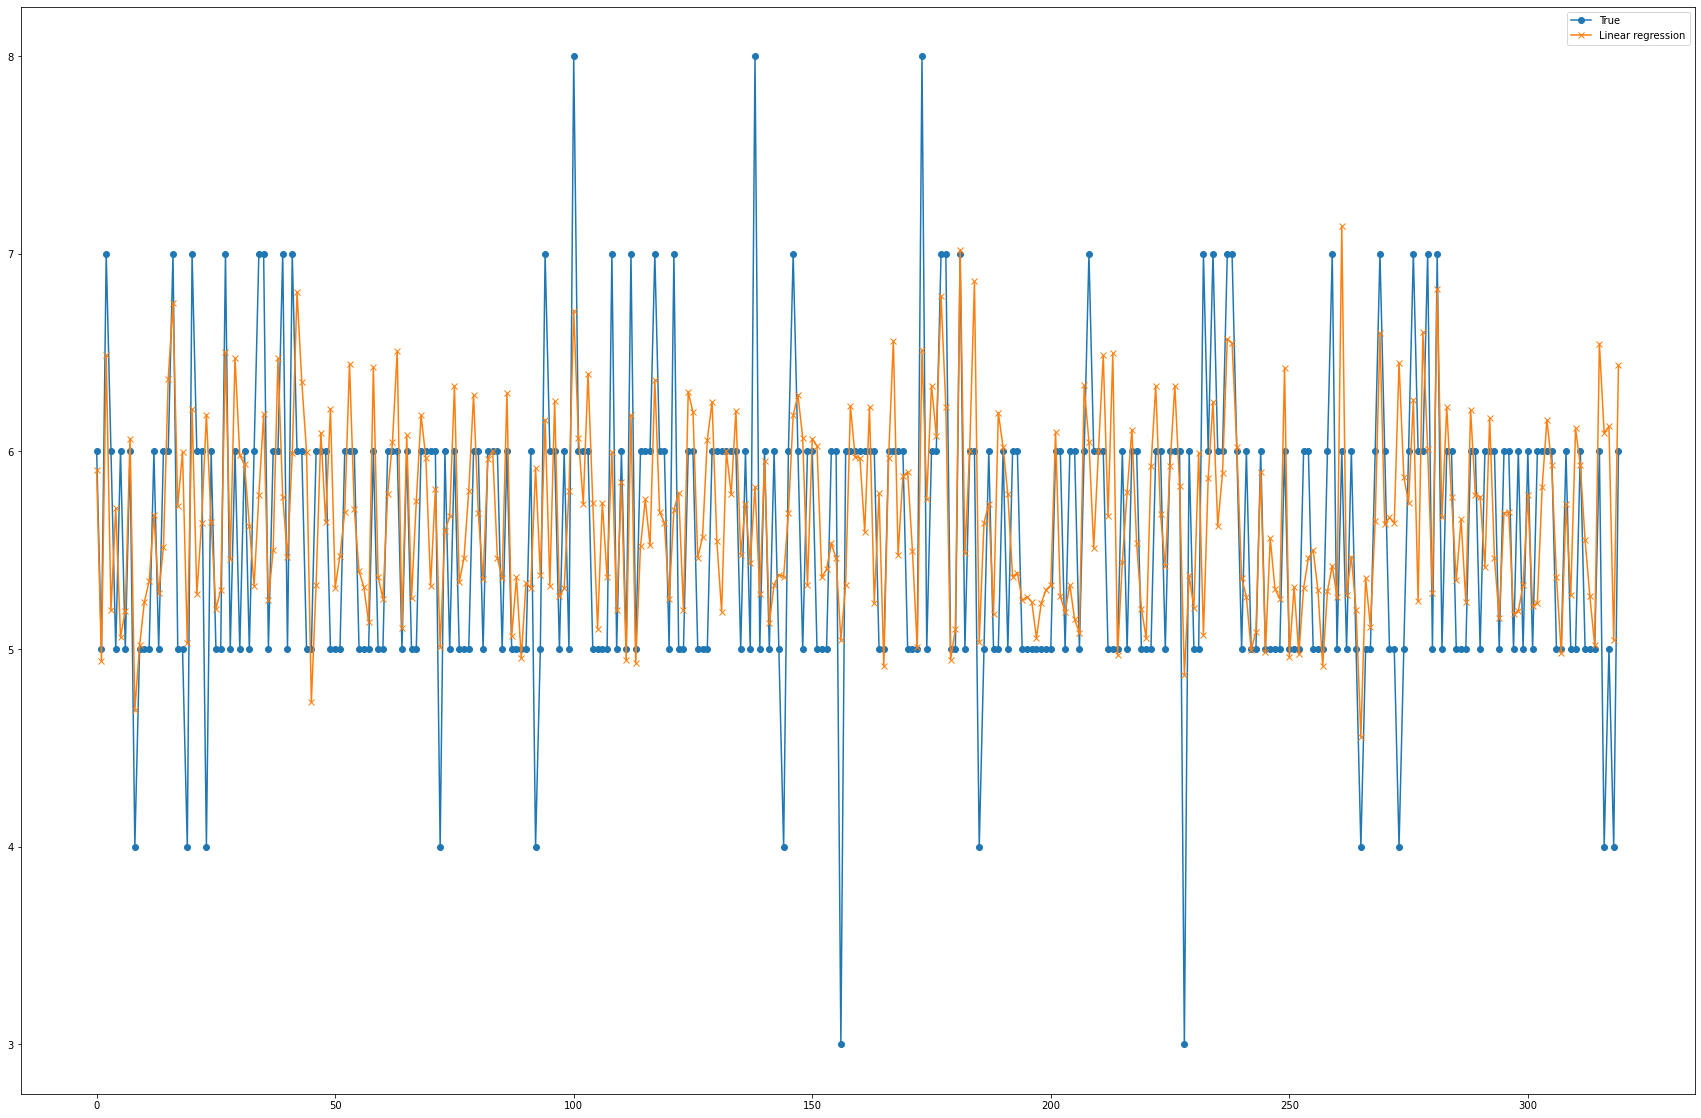

In [ ]:
import matplotlib.pyplot as plt
plt.show()
plt.figure(figsize=(30,20))
line1, = plt.plot(y_test,'o-')
line2, = plt.plot(y_predlr,'x-')
plt.legend([line1, line2], ['True', 'Linear regression'])

# In this plot you can see the relationship between the linear regression model and the true value of the data. It can be seen that the model does a good of predicting the true value with a few outliers.

In [ ]:
## Feature selection for regression

import seaborn as sns   # Load in seaborn, a statistical data visualization package

# Put the data into a dataframe
excluded = ["drop"]
ddf = df.drop(excluded, axis=1)  # The input variables + the response (bulk modulus)
ddf.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Random forest ML
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(x_train, y_train)

y_predRF = rf.predict(x_test)

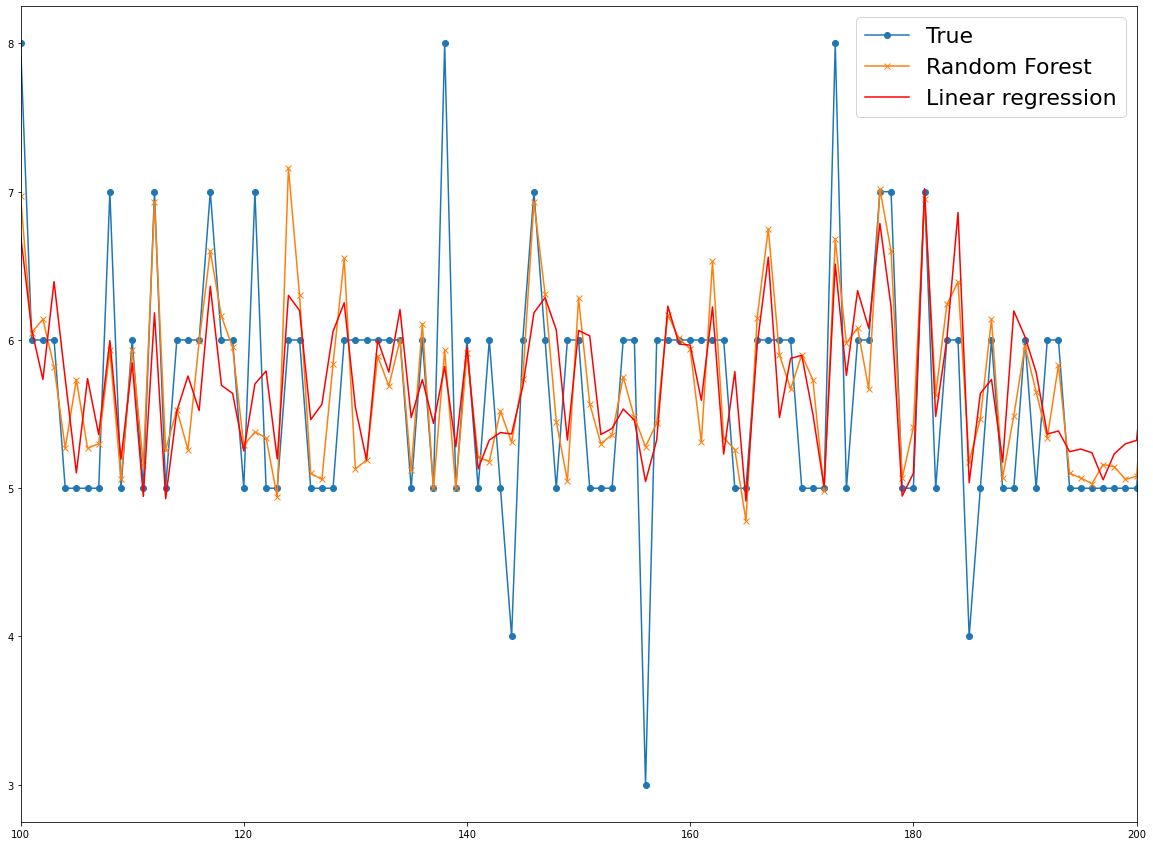

In [ ]:
import matplotlib.pyplot as plt
plt.show()
plt.figure(figsize=(20,15))
plt.xlim(100,200)

line1, = plt.plot(y_test, 'o-')
line2, = plt.plot(y_predRF, 'x-')
line3, = plt.plot(y_predlr, 'r-')
plt.legend([line1, line2, line3], ['True', 'Random forest','Linear Regression'])
plt.legend(["True", "Random Forest","Linear regression"], prop={"size":22})
#MSELR=mean_squared_error(y_predlr,y_test)
MSELR=np.square(np.subtract(y_test,y_predlr)).mean()
MSERF=mean_squared_error(y_predRF,y_test)

# In this plot you can see the relationship between the Random forest model and the true value of the data. It can be seen that the model does a good of predicting the true value with less outliers than the linear regression model.

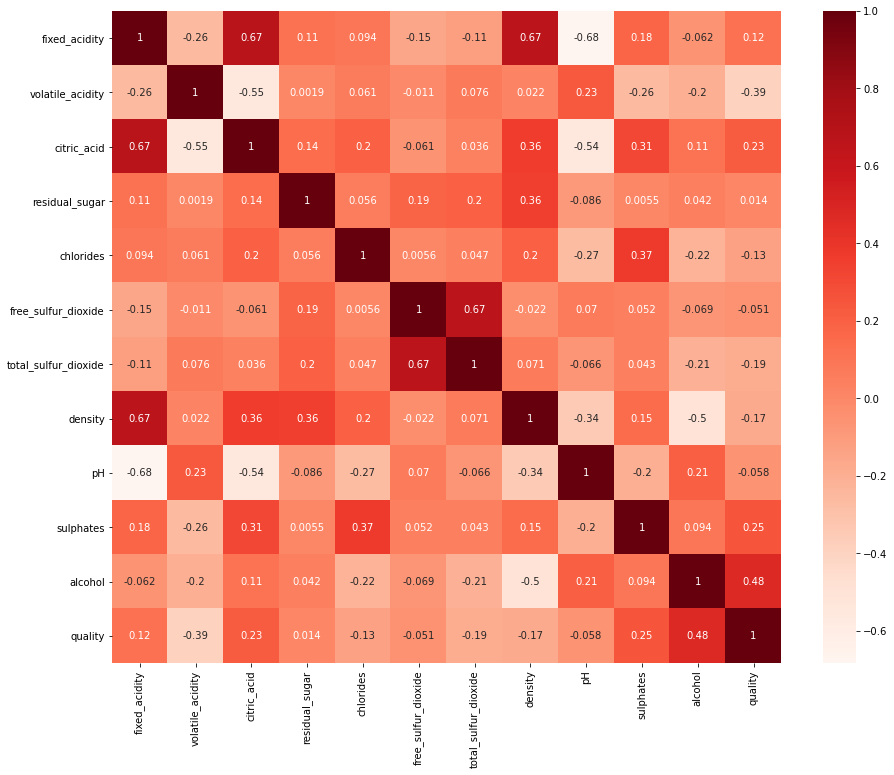

In [ ]:
#Check the correlation between the input variable and the response
plt.figure(figsize=(15,12))
cor = ddf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) #Using Pearson Correlation
plt.show()

In [ ]:
X

,volatile_acidity,citric_acid,sulphates,alcohol
0,0.700,0.00,0.56,9.4
1,0.880,0.00,0.68,9.8
2,0.760,0.04,0.65,9.8
3,0.280,0.56,0.58,9.8
4,0.700,0.00,0.56,9.4
...,...,...,...,...
1594,0.600,0.08,0.58,10.5
1595,0.550,0.10,0.76,11.2
1596,0.510,0.13,0.75,11.0
1597,0.645,0.12,0.71,10.2


In [ ]:
mean_squared_error(y_test,y_predRF)


0.3693465279513889

In [ ]:
mean_squared_error(y_test,y_predlr)

0.400926302923135